# Hypothesis Tests

- Analysis of one proportion Confidential Interval
- Analysis of variance Confidential Interval
- T-test for the means of *two independent* samples of scores
- Z-test for the proportions of *two independent* samples
- Chi-square test
- One-Way ANOVA
- Two-Way ANOVA

In [1]:
import numpy as np
import scipy.stats as stats
from statsmodels.stats import proportion

## Analysis of one proportion: Confidential Interval

Calculate the confidence intervals of the population, based on a given data sample.

*Suppose a general practitioner chooses a random sample of 215 women from
the patient register for her general practice, and finds that 39 of them
have a history of suffering from asthma. What is the confidence interval
for the prevalence of asthma?*

(The data are taken from Altman, chapter 10.2.1:)

In [2]:
# Get the data
num_total = 215
num_positive = 39
alpha = 0.05

# Calculate the confidence intervals
p = float(num_positive) / num_total
se = np.sqrt(p * (1 - p) / num_total)
td = stats.norm.isf(alpha / 2.)
ci = p + np.array([-1, 1]) * td * se

# Print them
print('ONE PROPORTION')
print(f'The confidence interval for the given sample is {ci[0]:5.6f} to {ci[1]:5.6f}')
print('ONE PROPORTION using Statsmodels:')
ci = proportion.proportion_confint(num_positive, num_total, alpha=alpha)
print(f'The confidence interval for the given sample is {ci[0]:5.6f} to {ci[1]:5.6f}')

ONE PROPORTION
The confidence interval for the given sample is 0.129887 to 0.232904
ONE PROPORTION using Statsmodels:
The confidence interval for the given sample is 0.129887 to 0.232904


## Analysis of variance: Confidential Interval

In [3]:
from scipy import stats


def variance_ci(variance, confidence_level, n):
    alpha = 1 - confidence_level
    dof = n - 1
    chi2_1_alpha_half = stats.chi2.isf(1 - alpha / 2, df=dof)
    chi2_alpha_half = stats.chi2.isf(alpha / 2, df=dof)
    lower_limit = dof * variance / chi2_alpha_half
    upper_limit = dof * variance / chi2_1_alpha_half

    print(f'Chi-Square {dof},{1 - alpha / 2:.4f}: {chi2_1_alpha_half:.4f}')
    print(f'Chi-Square {dof},{alpha / 2:.4f}: {chi2_alpha_half:.4f}')
    print(f'{(upper_limit - lower_limit):.4f}')
    return lower_limit, upper_limit


data = np.random.randint(180, 210, 30)
variance = stats.tvar(data)
print(f'variance={variance:5.4f}')
lower_limit, upper_limit = variance_ci(variance, confidence_level=0.95, n=len(data))
print(f'[{lower_limit:.4f}; {upper_limit:.4f}]')

variance=85.5414
Chi-Square 29,0.9750: 16.0471
Chi-Square 29,0.0250: 45.7223
100.3331
[54.2558; 154.5890]


## T-test for the means of *two independent* samples of scores

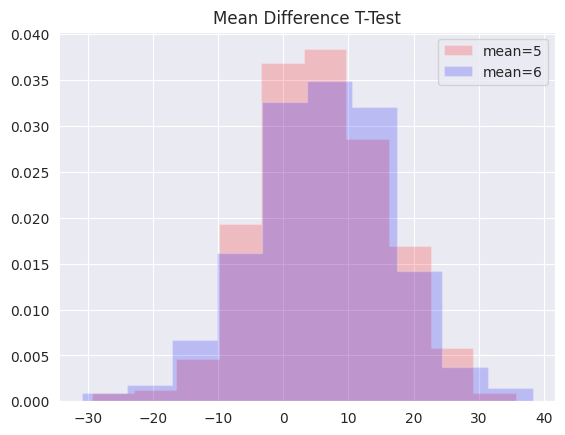

Test T Statistic: -0.6116
Computed P-value is 5.4093E-01
Mean Difference T-Test with stats.ttest_ind:
Test Statistic: -0.6116
p-value:5.4093E-01


In [25]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

mean1 = 5
mean2 = 6
std1 = 10
std2 = 10
sample_size1 = 500
sample_size2 = 500

rvs1 = stats.norm.rvs(loc=mean1, scale=std1, size=sample_size1)
rvs2 = stats.norm.rvs(loc=mean2, scale=std2, size=sample_size2)

fig, ax = plt.subplots(1, 1)
ax.hist(rvs1, density=True, histtype='stepfilled', alpha=0.2, color='red')
ax.hist(rvs2, density=True, histtype='stepfilled', alpha=0.2, color='blue')
ax.legend(labels=[f'mean={mean1}', f'mean={mean2}'])
ax.set_title('Mean Difference T-Test')
plt.show()

std_pulled = (stats.tvar(rvs1) * (sample_size1 - 1) + stats.tvar(rvs2) * (sample_size2 - 1)) / (
        sample_size1 + sample_size2 - 2)
statistic_t = (np.mean(rvs1) - np.mean(rvs2)) / np.sqrt(std_pulled / sample_size1 + std_pulled / sample_size2)

p_value = 2 * stats.t(sample_size1 + sample_size2 - 2).cdf(
    statistic_t)  # Multiplied by two indicates a two tailed testing.
print(f'Test T Statistic: {statistic_t:5.4f}')
print(f'Computed P-value is {p_value:5.4E}')

print('Mean Difference T-Test with stats.ttest_ind:')
result = stats.ttest_ind(rvs1, rvs2, equal_var=False, alternative='two-sided')
print(f'Test Statistic: {result.statistic:5.4f}\np-value:{result.pvalue:5.4E}')

## Z-test for the proportions of *two independent* samples

Let us consider the Titanic Survivals' dataset in the *datasets/titanic_survivals.csv*
file. We consider the two categorical variable Survived and Sex, is the proportion
of _male_ ($p_m$) survived any different from the proportion of _female_ survived ($p_f$).

The hypothesis we test is if the above difference of proportions will be zero
or not equal to zero(a two tailed test will be required). With a significance level
set at $\alpha=0.05$.
Mathematically, we represent it as:

\begin{matrix}
H_0: p_f - p_m = 0
\\
H_1: p_f - p_m \neq 0
\end{matrix}

In [5]:
import pandas as pd
import scipy.stats.distributions as dist

df = pd.read_csv('../datasets/titanic_survivals.csv')

print(df.head(10))

df['Survived'] = df['Survived'].map({1: 'Survived', 0: 'Not Survived'})  #Encode the values
df = df.dropna()  #Drop the nan values

contingency_table = pd.crosstab(df.Survived, df.Sex)
print('Contingency Table with absolute frequencies:')  #Contingency Table
print(contingency_table)
print('Contingency Table with relative frequencies:')  #Contingency Table
print(pd.crosstab(df.Survived, df.Sex).apply(lambda r: r / r.sum(), axis=1))

   PassengerId  Survived  Pclass   
0            1         0       3  \
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp   
0                            Braund, Mr. Owen Harris    male  22.0      1  \
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54

### Assumptions

1. Independent random samples
2. Optimal sample size (at least 10 data points per class per proportion)

In [6]:
total_proportion_survived = (df.Survived == "Survived").mean()
print(total_proportion_survived)
num_female = df[df.Sex == "female"].shape[0]
num_male = df[df.Sex == "male"].shape[0]
assert num_female * total_proportion_survived > 10, "Assumptions not met"
assert num_male * total_proportion_survived > 10, "Assumptions not met"
assert num_female * (1 - total_proportion_survived) > 10, "Assumptions not met"
assert num_male * (1 - total_proportion_survived) > 10, "Assumptions not met"

0.6721311475409836


The standard error is:

$ SE(p) = \sqrt( (1-P)(\frac{1}{n_f}+\frac{1}{n_m}) )$

The test statistic is:

$ \frac{\text{Best Estimate} - \text{Hypothesis Estimate}}{\text{Standard Error of Estimate}}$

In [7]:
#This table helps us to calculate the SE.
prop = df.groupby("Sex")["Survived"].agg([lambda z: np.mean(z == "Survived"), "size"])
prop.columns = ['proportions_survived', 'total_counts']
print(prop.head())

#Calculating standard error

variance = total_proportion_survived * (1 - total_proportion_survived)
standard_error = np.sqrt(variance * (1 / prop.total_counts.female + 1 / prop.total_counts.male))
print(f'Sample Standard Error: {standard_error}')

# Calculate the test statistic
best_estimate = (prop.proportions_survived.female - prop.proportions_survived.male)
print(f'The best estimate is {best_estimate}')
hypothesized_estimate = 0
test_stat = (best_estimate - hypothesized_estimate) / standard_error
print(f'Computed Test Statistic is: {test_stat}')

# Calculate the  p-value
p_value = 2 * dist.norm.cdf(-np.abs(test_stat))  # Multiplied by two indicates a two tailed testing.
print(f'Computed P-value is {p_value}')

        proportions_survived  total_counts
Sex                                       
female              0.931818            88
male                0.431579            95
Sample Standard Error: 0.06945435736849903
The best estimate is 0.5002392344497607
Computed Test Statistic is: 7.202416859113346
Computed P-value is 5.915451296155379e-13


This implicates that our sample proportion difference estimate is ~7.2
standard errors above our hypothesized estimate!

The $p\_value=5.9^{-13}$ is far less than $\alpha=0.05$ thus we have *strong* empirical
evidence that the proportion of male and female survived is *different*!

The same calculation can be carried out using _statsmodels_ python library:

In [8]:
from statsmodels.stats import proportion

count = [contingency_table.female[1], contingency_table.male[1]]
nobs = [contingency_table.female.sum(), contingency_table.male.sum()]
print(count, nobs)
z_stat, p_value = proportion.proportions_ztest(count, nobs, 0,
                                               alternative='two-sided')
print(f'Z-Statitstic: {z_stat}\n p_value: {p_value}')

[82, 41] [88, 95]
Z-Statitstic: 7.202416859113346
 p_value: 5.915451296155379e-13


## Chi-square test to a 2x2 table

Data are taken from Altman, Table 10.10:

*Comparison of number of hours swimming by swimmers with or without erosion of dental enamel:*
    >= 6h: 32 yes, 118 no
    <  6h: 17 yes, 127 no
    
The calculations are done with and without Yate's continuity
correction.

In [9]:
# Enter the data
obs = np.array([[32, 118], [17, 127]])

# Calculate the chi-square test
chi2_corrected = stats.chi2_contingency(obs, correction=True)
chi2_uncorrected = stats.chi2_contingency(obs, correction=False)

# Print the result
print('CHI SQUARE')
print('The corrected chi2 value is {0:5.3f}, with p={1:5.3f}'.format(chi2_corrected[0], chi2_corrected[1]))
print('The uncorrected chi2 value is {0:5.3f}, with p={1:5.3f}'.format(chi2_uncorrected[0], chi2_uncorrected[1]))

CHI SQUARE
The corrected chi2 value is 4.141, with p=0.042
The uncorrected chi2 value is 4.802, with p=0.028


In [10]:
# Enter the data
obs = np.array([[1, 5], [8, 2]])

# Calculate the Fisher Exact Test
fisher_result = stats.fisher_exact(obs)

# Print the result
print('The probability of obtaining a distribution at least as extreme '
      + 'as the one that was actually observed, assuming that the null ' +
      'hypothesis is true, is: {0:5.3f}.'.format(fisher_result[1]))

The probability of obtaining a distribution at least as extreme as the one that was actually observed, assuming that the null hypothesis is true, is: 0.035.


# One-way ANOVA

For the one-way ANOVA, you can use either the function in "scipy.stats". Alternatively, you can use the "statsmodel" tools: they provide more, and nicer formatted, information.


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import urllib
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import seaborn as sns

# The importance of the variance

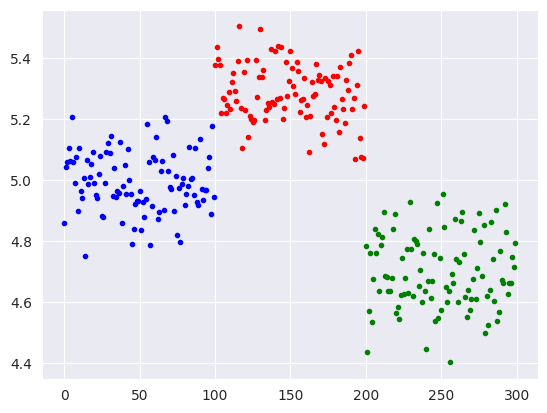

In [12]:
centers = [5, 5.3, 4.7]
std1 = 0.1
colors = 'brg'

data1 = []
for ii in range(3):
    data1.append(stats.norm(centers[ii], std1).rvs(100))
    plt.plot(np.arange(len(data1[ii])) + ii * len(data1[0]), data1[ii], '.',
             color=colors[ii])

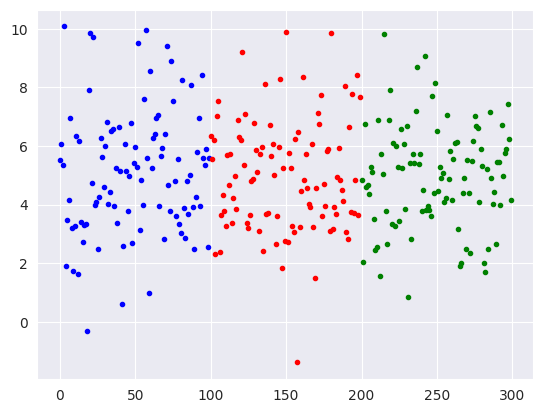

In [13]:
std2 = 2
data2 = []
for ii in range(3):
    data2.append(stats.norm(centers[ii], std2).rvs(100))
    plt.plot(np.arange(len(data1[ii])) + ii * len(data2[0]), data2[ii], '.',
             color=colors[ii])

**Note:** In both cases the means have the same difference, but the variance is much larger in data2!

## ANOVA with Sample Data

### Get and sort sample data

*Twenty-two patients undergoing cardiac bypass surgery were randomized to one of three ventilation groups:*

  - *Group I: Patients received 50% nitrous oxide and 50% oxygen mixture continuously for 24 h.*
  - *Group II: Patients received a 50% nitrous oxide and 50% oxygen mixture only dirng the operation.*
  - *Group III: Patients received no nitrous oxide but received 35-50% oxygen for 24 h.*

*The data show red cell folate levels for the three groups after 24h' ventilation.*

In [14]:
# Get the data
inFile = 'altman_910.txt'
url_base = 'https://raw.githubusercontent.com/thomas-haslwanter/statsintro_python/master/ipynb/Data/data_altman/'

url = url_base + inFile
data = np.genfromtxt(urllib.request.urlopen(url), delimiter=',')

# Sort them into groups, according to column 1
group1 = data[data[:, 1] == 1, 0]
group2 = data[data[:, 1] == 2, 0]
group3 = data[data[:, 1] == 3, 0]

### Levene-test
A Levene-test and/or a normality test should be made before applying a oneway ANOVA.

In [15]:
# check if the variances are equal with the "Levene"-test
(W, p) = stats.levene(group1, group2, group3)
if p < 0.05:
    print('Warning: the p-value of the Levene test is <0.05: p={0}'.format(p))

### One-way ANOVA

In [16]:
F_statistic, pVal = stats.f_oneway(group1, group2, group3)

print(
    'The results from the one-way ANOVA, with the data from Altman 910: F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))
if pVal < 0.05:
    print('One of the groups is significantly different.')

The results from the one-way ANOVA, with the data from Altman 910: F=3.7, p=0.04359
One of the groups is significantly different.


## Elegant alternative implementation, with pandas & statsmodels

In [17]:
df = pd.DataFrame(data, columns=['value', 'treatment'])

# the "C" indicates categorical data
model = ols('value ~ C(treatment)', df).fit()

print(anova_lm(model))

                df        sum_sq      mean_sq         F    PR(>F)
C(treatment)   2.0  15515.766414  7757.883207  3.711336  0.043589
Residual      19.0  39716.097222  2090.320906       NaN       NaN


# Two-way ANOVA

ANOVA with interaction:

*Measurement of fetal head circumference, by four observers in three fetuses, from a study investigating the
reproducibility of ultrasonic fetal head circumference data.*

In [18]:
import numpy as np
import pandas as pd
import urllib
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

## Get and format the data

In [19]:
inFile = 'altman_12_6.txt'
url_base = 'https://raw.githubusercontent.com/thomas-haslwanter/statsintro_python/master/ipynb/Data/data_altman/'
url = url_base + inFile
data = np.genfromtxt(urllib.request.urlopen(url), delimiter=',')

# Bring them in dataframe-format
df = pd.DataFrame(data, columns=['hs', 'fetus', 'observer'])

## ANOVA with interaction

In [20]:
formula = 'hs ~ C(fetus) + C(observer) + C(fetus):C(observer)'
lm = ols(formula, df).fit()
print(anova_lm(lm))

                        df      sum_sq     mean_sq            F        PR(>F)
C(fetus)               2.0  324.008889  162.004444  2113.101449  1.051039e-27
C(observer)            3.0    1.198611    0.399537     5.211353  6.497055e-03
C(fetus):C(observer)   6.0    0.562222    0.093704     1.222222  3.295509e-01
Residual              24.0    1.840000    0.076667          NaN           NaN
